# Backpack Price Prediction

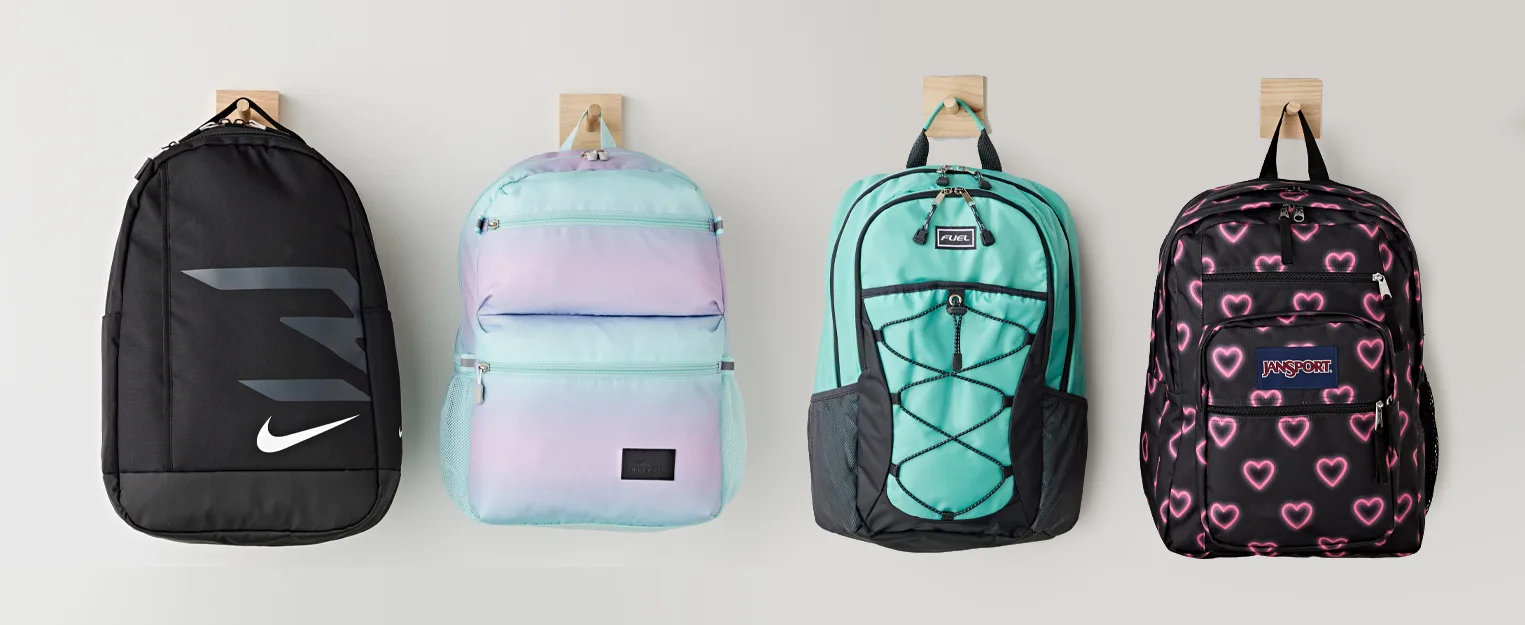
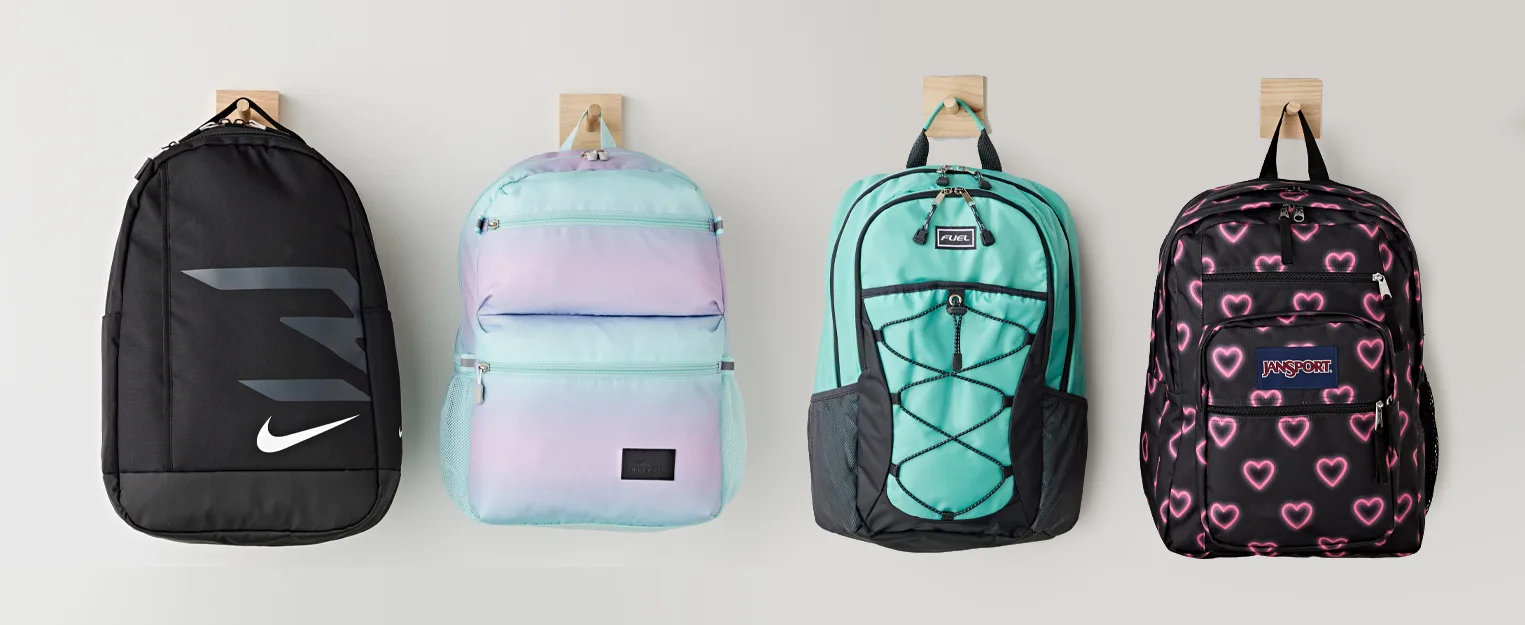

## Aim

The aim of this project is to predict the price of backpacks based on various features such as brand, material, size, compartments, style, and other attributes. By building a predictive model, we aim to identify patterns and relationships in the data that can help estimate the price of backpacks based on their characteristics. This model can be used by manufacturers, retailers, or customers to make informed decisions about pricing.

## Dataset Columns Explanation

The dataset contains the following columns:

1. **id**: A unique identifier for each backpack.
2. **Brand**: The brand name of the backpack (e.g., Jansport, Nike, Adidas).
3. **Material**: The material used to make the backpack (e.g., Leather, Canvas, Nylon).
4. **Size**: The size of the backpack (e.g., Small, Medium).
5. **Compartments**: The number of compartments in the backpack.
6. **Laptop Compartment**: Indicates whether the backpack has a compartment for a laptop (Yes/No).
7. **Waterproof**: Indicates whether the backpack is waterproof (Yes/No).
8. **Style**: The style or type of backpack (e.g., Messenger, Tote).
9. **Color**: The color of the backpack (e.g., Black, Green, Red).
10. **Weight Capacity (kg)**: The maximum weight the backpack can hold (in kilograms).
11. **Price**: The price of the backpack (target variable).


## Requirements

In [42]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',None)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale

## Import Data

In [57]:
df=pd.read_csv('/kaggle/input/playground-series-s5e2/train.csv')

## EDA (Exploratory Data Analysis)

In [5]:
df.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [6]:
df.shape

(300000, 11)

In [7]:
df.isnull().sum()

id                         0
Brand                   9705
Material                8347
Size                    6595
Compartments               0
Laptop Compartment      7444
Waterproof              7050
Style                   7970
Color                   9950
Weight Capacity (kg)     138
Price                      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    300000 non-null  int64  
 1   Brand                 290295 non-null  object 
 2   Material              291653 non-null  object 
 3   Size                  293405 non-null  object 
 4   Compartments          300000 non-null  float64
 5   Laptop Compartment    292556 non-null  object 
 6   Waterproof            292950 non-null  object 
 7   Style                 292030 non-null  object 
 8   Color                 290050 non-null  object 
 9   Weight Capacity (kg)  299862 non-null  float64
 10  Price                 300000 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 25.2+ MB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,149999.500000,86602.684716,0.0,74999.750000,149999.500000,224999.250000,299999.0
Compartments,300000.0,5.443590,2.890766,1.0,3.000000,5.000000,8.000000,10.0
Weight Capacity (kg),299862.0,18.029994,6.966914,5.0,12.097867,18.068614,24.002375,30.0
Price,300000.0,81.411107,39.039340,15.0,47.384620,80.956120,115.018160,150.0


In [10]:
df['Brand'].value_counts()

Brand
Adidas          60077
Under Armour    59992
Nike            57336
Puma            56814
Jansport        56076
Name: count, dtype: int64

In [11]:
df['Material'].value_counts()

Material
Polyester    79630
Leather      73416
Nylon        70603
Canvas       68004
Name: count, dtype: int64

In [12]:
df['Size'].value_counts()

Size
Medium    101906
Large      98643
Small      92856
Name: count, dtype: int64

In [13]:
df['Laptop Compartment'].value_counts()

Laptop Compartment
Yes    148342
No     144214
Name: count, dtype: int64

In [14]:
df['Style'].value_counts()

Style
Messenger    100031
Tote          97438
Backpack      94561
Name: count, dtype: int64

In [15]:
df['Color'].value_counts()

Color
Pink     51690
Gray     50280
Blue     48097
Red      47219
Green    46386
Black    46378
Name: count, dtype: int64

## Data Visaulization

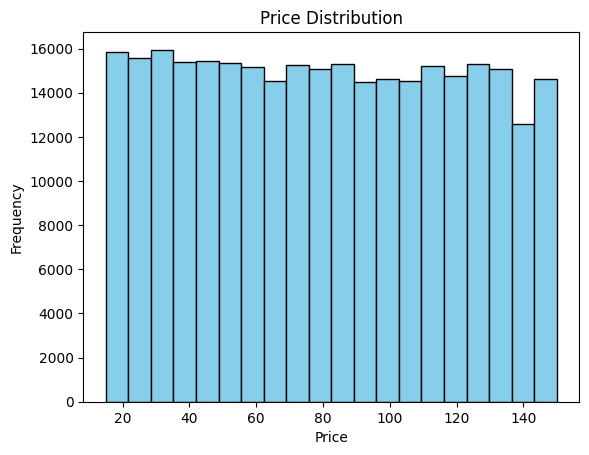

In [58]:
plt.hist(df['Price'], bins=20, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency');

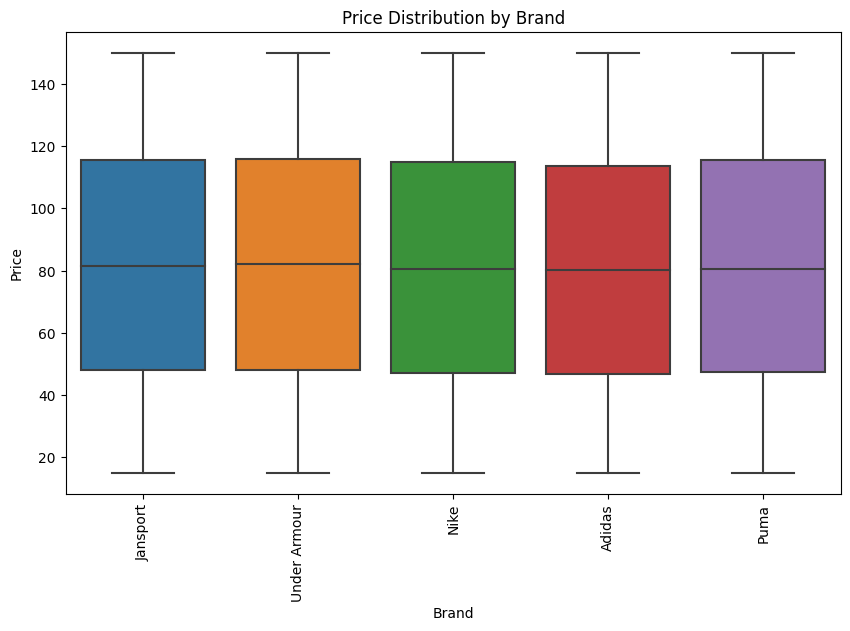

In [61]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Price Distribution by Brand')
plt.xticks(rotation=90);

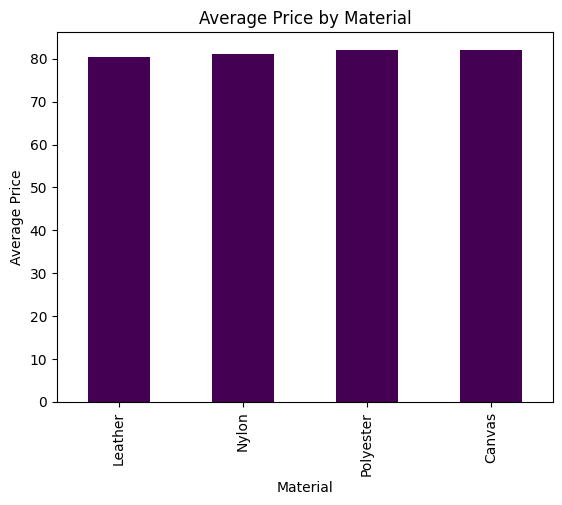

In [65]:
material_price = df.groupby('Material')['Price'].mean().sort_values()
material_price.plot(kind='bar', cmap='viridis')
plt.title('Average Price by Material')
plt.xlabel('Material')
plt.ylabel('Average Price');

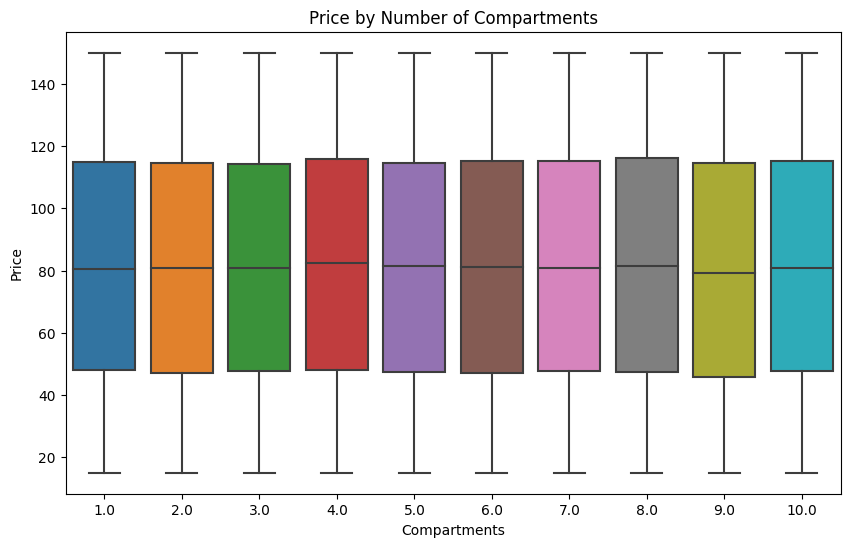

In [67]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Compartments', y='Price', data=df)
plt.title('Price by Number of Compartments');

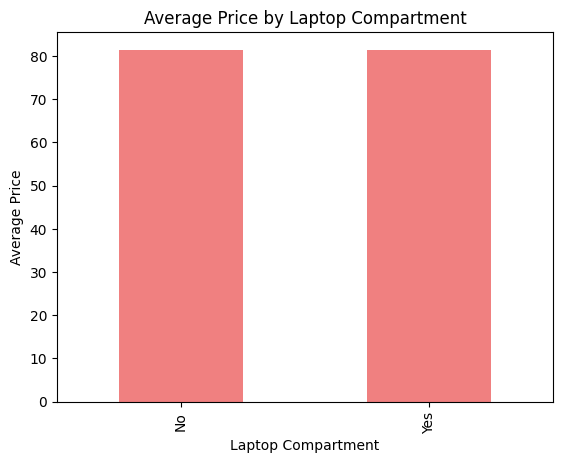

In [68]:
laptop_compartment_price = df.groupby('Laptop Compartment')['Price'].mean()
laptop_compartment_price.plot(kind='bar', color='lightcoral')
plt.title('Average Price by Laptop Compartment')
plt.xlabel('Laptop Compartment')
plt.ylabel('Average Price');

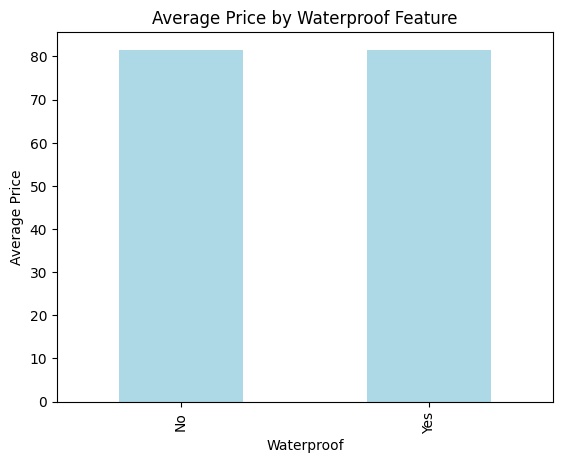

In [69]:
waterproof_price = df.groupby('Waterproof')['Price'].mean()
waterproof_price.plot(kind='bar', color='lightblue')
plt.title('Average Price by Waterproof Feature')
plt.xlabel('Waterproof')
plt.ylabel('Average Price');

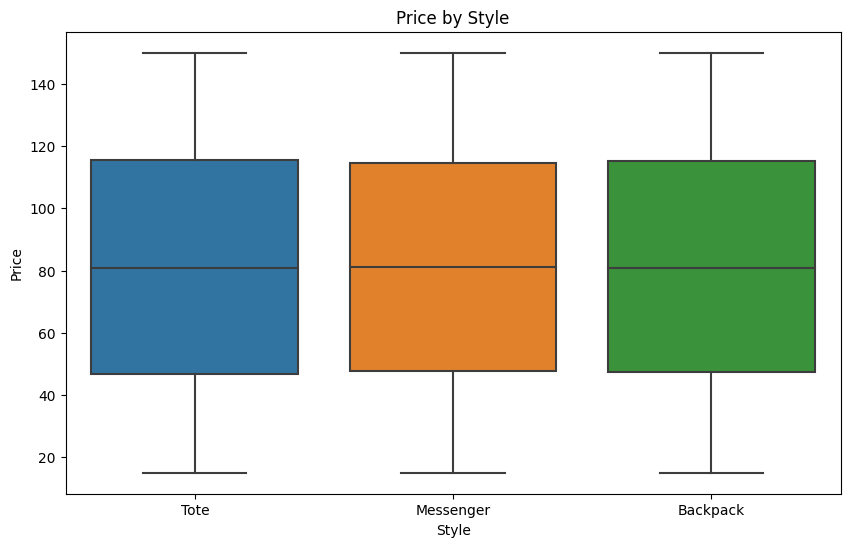

In [70]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Style', y='Price', data=df)
plt.title('Price by Style');

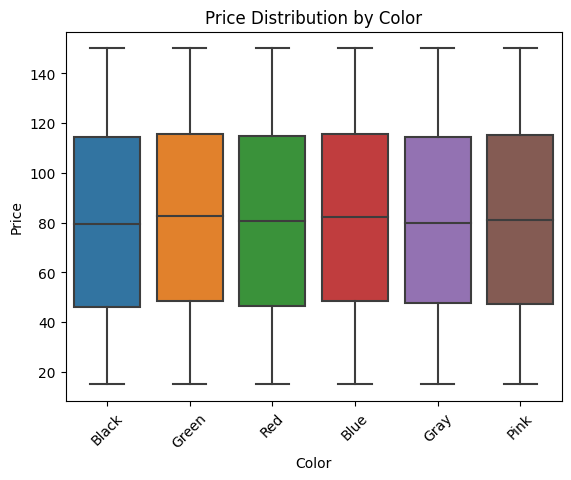

In [71]:
sns.boxplot(x='Color', y='Price', data=df)
plt.title('Price Distribution by Color')
plt.xticks(rotation=45);

## Feature Engineering

In [16]:
df.dropna(inplace=True)

In [17]:
from sklearn.impute import SimpleImputer

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

numerical_imputer = SimpleImputer(strategy='mean')


categorical_imputer = SimpleImputer(strategy='most_frequent')

df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

In [18]:
def perform_future_engineering(df):
    df['Brand_Material']=df['Brand']+'_'+df['Material']
    df['Brand_Size']=df['Brand']+'_'+df['Size']
    df['Has_Laptop_Compartment']=df['Laptop Compartment'].map({'Yes':1,'No':0})
    df['Is_Waterproof']=df['Waterproof'].map({'Yes':1,'No':0})
    df['Compartments_Category']=pd.cut(df['Compartments'], 
                                         bins=[0, 2, 5, 10, np.inf], 
                                         labels=['Few', 'Moderate', 'Many', 'Very Many'])
    df['Weight_Capacity_Ratio']=df['Weight Capacity (kg)']/df['Weight Capacity (kg)'].max()
    df['Weight_to_Compartments']=df['Weight Capacity (kg)']/(df['Compartments']+1)
    df['Style_Size']=df['Style']+'_'+df['Size']
    return df

In [19]:
df=perform_future_engineering(df)

## Modelling with Conversational Models

In [20]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price                     1.000000
Weight Capacity (kg)      0.015811
Weight_Capacity_Ratio     0.015811
Weight_to_Compartments    0.006137
id                        0.001807
Has_Laptop_Compartment    0.001490
Compartments              0.000066
Is_Waterproof             0.002248
Name: Price, dtype: float64

In [21]:
df.columns

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price',
       'Brand_Material', 'Brand_Size', 'Has_Laptop_Compartment',
       'Is_Waterproof', 'Compartments_Category', 'Weight_Capacity_Ratio',
       'Weight_to_Compartments', 'Style_Size'],
      dtype='object')

In [22]:
x=df[['Brand', 'Material', 'Size', 'Laptop Compartment','Waterproof', 
      'Style', 'Color','Brand_Material', 'Brand_Size', 'Has_Laptop_Compartment',
      'Is_Waterproof', 'Compartments_Category',
      'Style_Size','Weight Capacity (kg)','Weight_Capacity_Ratio','Weight_to_Compartments']]
y=df[['Price']]

In [23]:
x=pd.get_dummies(x,drop_first=True)

In [24]:
def regression_algo(x,y,plot=False):
    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    kn=KNeighborsRegressor()
    dt=DecisionTreeRegressor()
    xgb=XGBRegressor()
    rf=RandomForestRegressor()

    algos=[L,R,Lass,E,ETR,GBR,kn,dt,xgb,rf]
    algo_names=['Linear','Ridge','Lasso','ElasticNet','Extra Tree','Gradient Bossting','KNeighborRegressor','DecisionTreeRegressor','XGBReggressor','Random Forest Classifier']

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

    r_squared=[]
    rmse=[]
    mae=[]

    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

    for algo in algos:
        p=algo.fit(x_train,y_train).predict(x_test)
        r_squared.append(r2_score(y_test,p))
        rmse.append(mean_squared_error(y_test,p)**0.5)
        mae.append(mean_absolute_error(y_test,p))

    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae

    r_table=result.sort_values('R_Squared',ascending=False)
    if plot:
        best_model = algos[r_squared.index(max(r_squared))]
        y_pred = best_model.predict(x_test)
        
        plt.figure(figsize=(10,6))
        plt.plot(y_test.reset_index(drop=True),label='Acutal',color='green',linestyle='--')
        plt.plot(pd.Series(y_pred),label='Predicted',color='red',linestyle='--')
        plt.xlabel('Predicted Price')
        plt.ylabel('Actual Price')
        plt.title('Actual vs Predicted Price for Best Model')
        plt.legend()
        plt.show()
    return r_table

In [25]:
regression_algo(x,y,plot=False)

,R_Squared,RMSE,MAE
Gradient Bossting,0.001168,38.855983,33.585597
Ridge,0.001054,38.858211,33.593615
Linear,0.001036,38.858561,33.594041
ElasticNet,0.000298,38.872907,33.617471
Lasso,0.000279,38.873274,33.618198
XGBReggressor,-0.011518,39.101948,33.737090
Random Forest Classifier,-0.064874,40.119985,34.351944
KNeighborRegressor,-0.199428,42.579323,35.836592
DecisionTreeRegressor,-1.051453,55.685543,45.433060
Extra Tree,-1.064481,55.862082,45.515191


## Testing the Best Conversational Model

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
R=Ridge()
model=R.fit(x_train,y_train)

In [54]:
import joblib
joblib.dump(model, 'best_regression_model.pkl')

['best_regression_model.pkl']

In [27]:
df_test=pd.read_csv('/kaggle/input/playground-series-s5e2/test.csv')

In [28]:
df_test.shape

(200000, 10)

In [29]:
df_test.isnull().sum()

id                         0
Brand                   6227
Material                5613
Size                    4381
Compartments               0
Laptop Compartment      4962
Waterproof              4811
Style                   5153
Color                   6785
Weight Capacity (kg)      77
dtype: int64

In [30]:
numerical_columns_test = df_test.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_columns_test = df_test.select_dtypes(include=['object']).columns.tolist()

numerical_columns_test = [col for col in numerical_columns_test if col not in ['id', 'Price']]
categorical_columns_test = [col for col in categorical_columns_test if col not in ['id', 'Price']]
numerical_imputer.fit(df[numerical_columns_test])

categorical_imputer.fit(df[categorical_columns_test])  

df_test[numerical_columns_test] = numerical_imputer.transform(df_test[numerical_columns_test])

df_test[categorical_columns_test] = categorical_imputer.transform(df_test[categorical_columns_test])

In [31]:
df_test=perform_future_engineering(df_test)

In [32]:
submission=pd.DataFrame({
    'id':df_test['id']
})

In [33]:
df_test=df_test[['Brand', 'Material', 'Size', 'Laptop Compartment','Waterproof', 
      'Style', 'Color','Brand_Material', 'Brand_Size', 'Has_Laptop_Compartment',
      'Is_Waterproof', 'Compartments_Category',
      'Style_Size','Weight Capacity (kg)','Weight_Capacity_Ratio','Weight_to_Compartments']]

In [34]:
df_test=pd.get_dummies(df_test,drop_first=True)

In [35]:
predictions=model.predict(df_test)

In [36]:
submission['Price']=predictions

In [37]:
submission.to_csv('submission.csv',index=False)

## Feature Importance

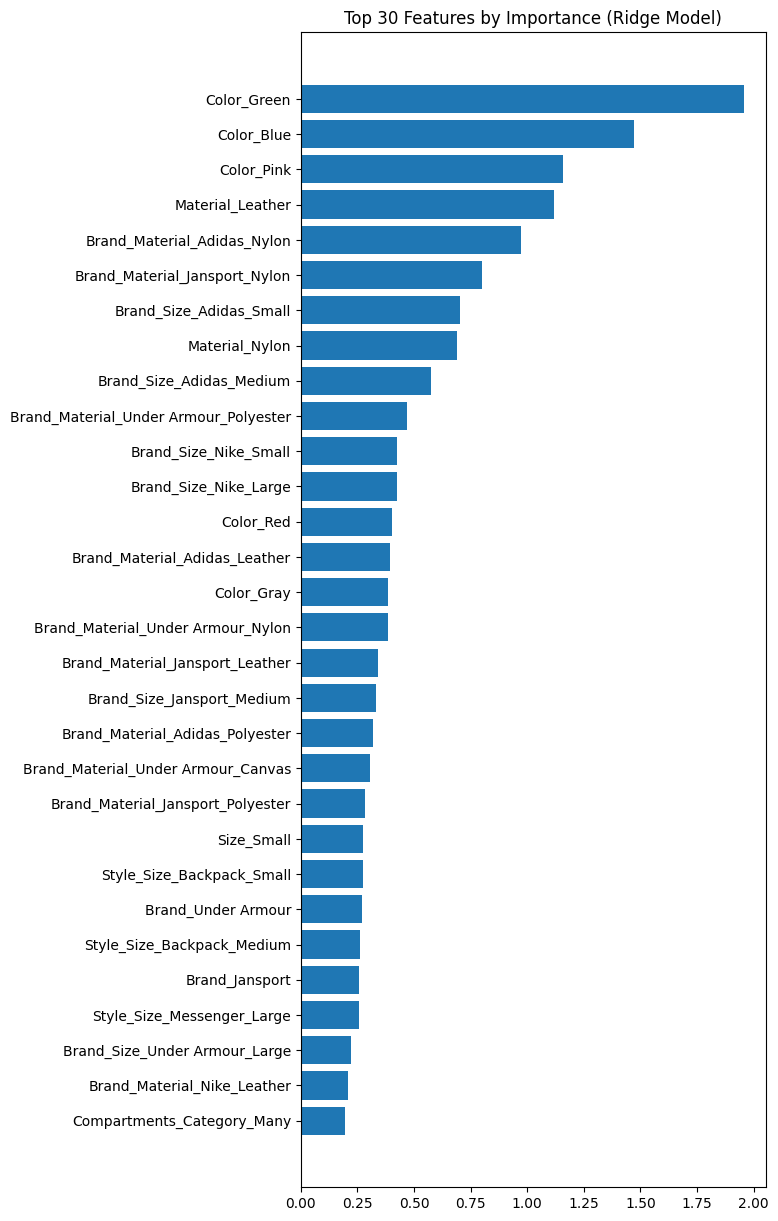

In [38]:
coefficients = np.abs(R.coef_).ravel()  # Use .ravel() to flatten the coefficients

feature_importance = pd.DataFrame({'Feature': x_train.columns, 'Importance': coefficients})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False).head(30)

plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.gca().invert_yaxis()
plt.title('Top 30 Features by Importance (Ridge Model)')
plt.show()

## Modelling with Deep Learning

In [39]:
x=df[['Brand', 'Material', 'Size', 'Laptop Compartment','Waterproof', 
      'Style', 'Color','Brand_Material', 'Brand_Size', 'Has_Laptop_Compartment',
      'Is_Waterproof', 'Compartments_Category',
      'Style_Size','Weight Capacity (kg)','Weight_Capacity_Ratio','Weight_to_Compartments']]
y=df[['Price']]

In [40]:
x=pd.get_dummies(x,drop_first=True)

In [43]:
model = Sequential()
model.add(Dense(120, activation='relu'))
model.add(Dense(80, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss='mse', optimizer='adam')

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [45]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, verbose=1)

Epoch 1/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - loss: 6989.7231 - val_loss: 1549.0818
Epoch 2/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1551.6720 - val_loss: 1527.2058
Epoch 3/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1539.2086 - val_loss: 1530.1008
Epoch 4/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1534.4276 - val_loss: 1619.8557
Epoch 5/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1531.2279 - val_loss: 1514.7637
Epoch 6/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1528.6608 - val_loss: 1514.9979
Epoch 7/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1523.0483 - val_loss: 1515.0333
Epoch 8/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1532.7317 - val_loss: 1528.9108
Epoch 9/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1526.8553 - val_loss: 1514.9346
Epoch 10/10
6168/6168 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - loss: 1522.4550 - val_loss: 1518.6067


In [46]:
predictions=model.predict(x_test)
r2_score(y_test,predictions)

1542/1542 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


-0.004666507454562208

In [47]:
mean_squared_error(y_test,predictions)**0.5

38.96930461888119

<Axes: >

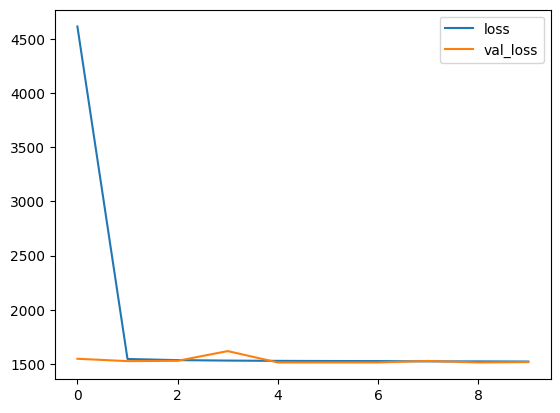

In [48]:
loss_f=pd.DataFrame(history.history)
loss_f.plot()

## Testing the Deep Learning Model

In [49]:
predictions=model.predict(df_test)

6250/6250 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


In [50]:
submission['Price']=predictions

In [51]:
submission.to_csv('submission.csv',index=False)

## Conclusion

In this project, we evaluated multiple machine learning algorithms to predict the price of backpacks. The models tested included Gradient Boosting, Ridge, Linear Regression, ElasticNet, Lasso, XGBoost, Random Forest, KNeighbors, Decision Trees, and Extra Trees. 

Among these models, Gradient Boosting, Ridge, and Linear Regression performed similarly, achieving R-squared values close to 0.001 and relatively low RMSE and MAE values. However, the performance of tree-based models, such as Random Forest and Extra Trees, was significantly worse, with R-squared values in the negative range, indicating poor predictive capability.

In comparison to these models, deep learning produced an even lower R-squared score of -0.0047, indicating that the neural network failed to capture the patterns in the data more effectively than traditional machine learning models. The Mean Squared Error (MSE) for the deep learning model was 38.97, which is comparable to the performance of tree-based methods but not better than simpler models like Gradient Boosting or Ridge.

Overall, the results suggest that traditional machine learning models like Gradient Boosting and Ridge are more suitable for predicting backpack prices based on the features provided in this dataset, while deep learning does not offer significant improvements in this case.